In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )
import os

In [2]:
df = pd.read_csv('캡스톤클러스터링데이터2.csv')
df

,시군구명,행정동명,인구지수,예산복지지수,공동육아나눔터유무
0,종로구,사직동,10613.930349,882439.63,0
1,종로구,삼청동,2075.538390,882439.63,0
2,종로구,부암동,6224.970589,882439.63,0
3,종로구,평창동,7591.582598,882439.63,0
4,종로구,무악동,2795.206491,882439.63,0
...,...,...,...,...,...
419,강동구,둔촌1동,2053.691100,1561745.44,0
420,강동구,둔촌2동,11843.518743,1561745.44,0
421,강동구,암사1동,11999.031127,1561745.44,0
422,강동구,천호2동,18400.280368,1561745.44,0


In [3]:
df1 = pd.read_csv('캡스톤클러스터링데이터2.csv', usecols=[2,3])
df1

,인구지수,예산복지지수
0,10613.930349,882439.63
1,2075.538390,882439.63
2,6224.970589,882439.63
3,7591.582598,882439.63
4,2795.206491,882439.63
...,...,...
419,2053.691100,1561745.44
420,11843.518743,1561745.44
421,11999.031127,1561745.44
422,18400.280368,1561745.44


In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df1 = sc.fit_transform(df1)
df1

array([[0.22161014, 0.02132355],
       [0.02116656, 0.02132355],
       [0.11857683, 0.02132355],
       [0.15065882, 0.02132355],
       [0.03806118, 0.02132355],
       [0.0463676 , 0.02132355],
       [0.05197721, 0.02132355],
       [0.5285766 , 0.02132355],
       [0.12407829, 0.02132355],
       [0.19170841, 0.02132355],
       [0.04746085, 0.02132355],
       [0.05530609, 0.02132355],
       [0.02221239, 0.02132355],
       [0.04601392, 0.02132355],
       [0.08807217, 0.02132355],
       [0.15431143, 0.02132355],
       [0.24659601, 0.02132355],
       [0.39296945, 0.        ],
       [0.20742931, 0.        ],
       [0.33141447, 0.        ],
       [0.10792397, 0.        ],
       [0.07992688, 0.        ],
       [0.18034554, 0.        ],
       [0.14169027, 0.        ],
       [0.07073969, 0.        ],
       [0.10496834, 0.        ],
       [0.06872863, 0.        ],
       [0.1859835 , 0.        ],
       [0.11839983, 0.        ],
       [0.11945819, 0.        ],
       [0.

HC

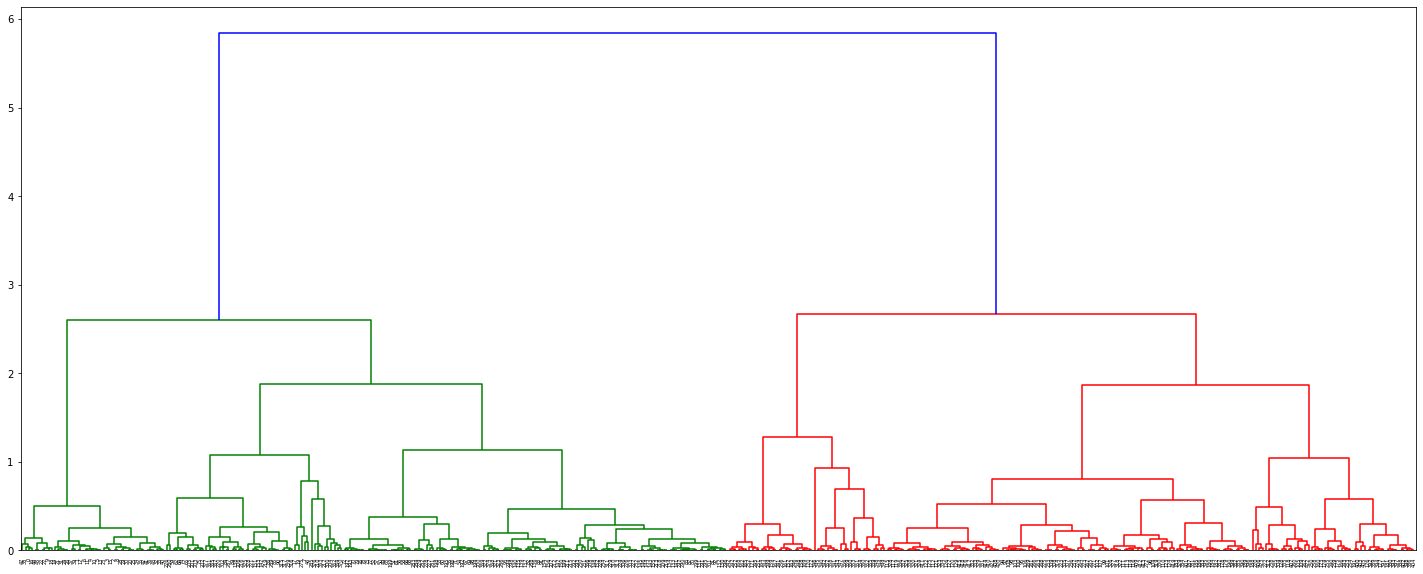

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(df1, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(affinity='euclidean',
                                                   n_clusters=19),
                 k=(2, 20))

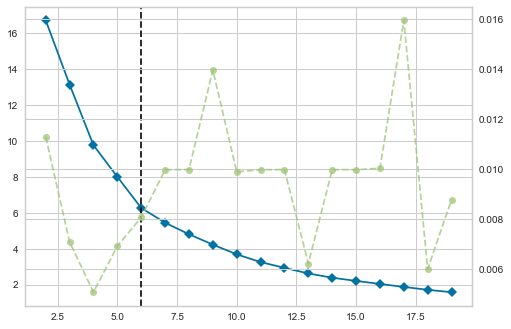

In [6]:
#최적의 클러스터 개수인 k를 찾기 위한 알고리즘
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

hc = AgglomerativeClustering(affinity='euclidean', linkage='ward')
visualizer = KElbowVisualizer(hc, k=(2, 20))
visualizer.fit(df1)

In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
c = hc.fit_predict(df1)
c

array([3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1,
       1, 4, 4, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 4,
       4, 4, 2, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 5, 5, 2, 4, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 5, 2, 5,
       5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4,
       1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,

In [6]:
df1_ = pd.DataFrame(df1)
df1_['c'] = c
df1_

,0,1,c
0,0.221610,0.021324,3
1,0.021167,0.021324,3
2,0.118577,0.021324,3
3,0.150659,0.021324,3
4,0.038061,0.021324,3
...,...,...,...
419,0.020654,0.552345,5
420,0.250475,0.552345,5
421,0.254126,0.552345,5
422,0.404399,0.552345,2


In [9]:
if os.name != 'posix':
    plt.rc("font", family="Malgun Gothic")

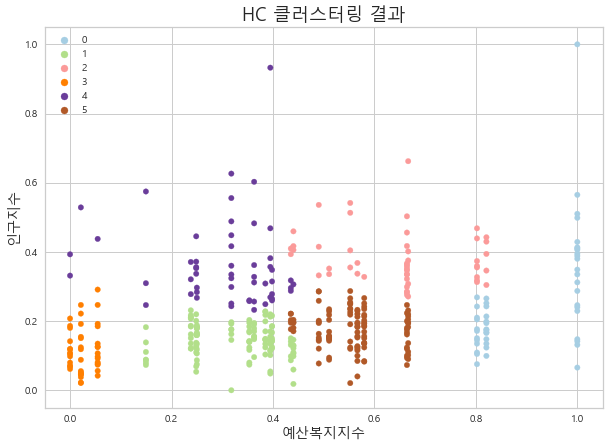

In [10]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(df1_[1], df1_[0], c=df1_['c'], s=30, cmap='Paired')
plt.xlabel('예산복지지수', fontsize=14)
plt.ylabel('인구지수', fontsize=14)
plt.title('HC 클러스터링 결과', fontsize=18)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5])
plt.show()

In [7]:
df1_.columns=['인구지수', '예산복지지수', 'c']

In [8]:
print('[클러스터 0]')
print(df1_[df1_['c']==0][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 1]')
print(df1_[df1_['c']==1][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 2]')
print(df1_[df1_['c']==2][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 3]')
print(df1_[df1_['c']==3][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 4]')
print(df1_[df1_['c']==4][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 5]')
print(df1_[df1_['c']==5][['인구지수', '예산복지지수']].mean())

[클러스터 0]
인구지수      0.258859
예산복지지수    0.898273
dtype: float64

[클러스터 1]
인구지수      0.145531
예산복지지수    0.328759
dtype: float64

[클러스터 2]
인구지수      0.381627
예산복지지수    0.648442
dtype: float64

[클러스터 3]
인구지수      0.115813
예산복지지수    0.026320
dtype: float64

[클러스터 4]
인구지수      0.362491
예산복지지수    0.304769
dtype: float64

[클러스터 5]
인구지수      0.175161
예산복지지수    0.560731
dtype: float64


KMeans

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=19), k=(2, 20))

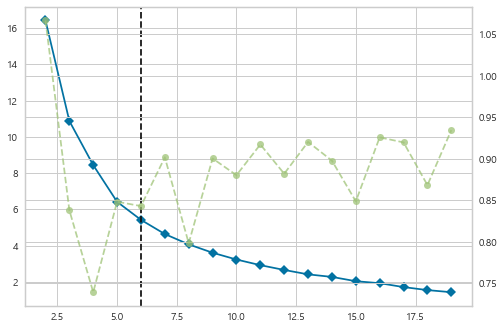

In [13]:
#최적의 클러스터 개수인 k를 찾기 위한 알고리즘
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2, 20))
visualizer.fit(df1)

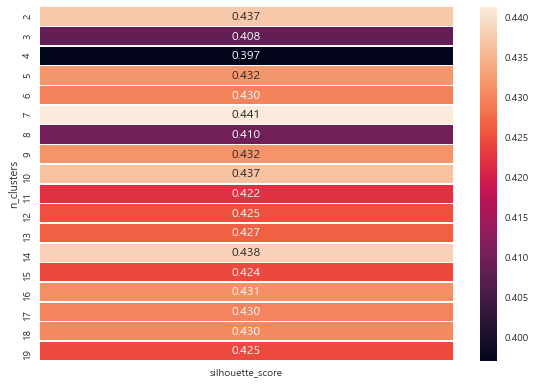

In [14]:
# 실루엣 계수로 최적의 클러스터 개수인 k 찾기
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_silhouette_layer(data):
    clusters_range = range(2, 20)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, random_state=110)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(df1)

In [8]:
from sklearn.cluster import KMeans
from scipy.stats import mode

km = KMeans(n_clusters=7, random_state = 42)
km.fit(df1)
clusters = km.labels_

In [9]:
clusters

array([3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 2, 2, 2, 2, 5, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 6, 1, 6,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 5, 2, 2,
       5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 1, 1,
       1, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 6, 1, 1, 6, 1, 4, 2, 5, 2,
       4, 2, 2, 2, 2, 2, 5, 2, 2, 4, 4, 5, 0, 3, 0, 3, 0, 0, 3, 3, 3, 5,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,

In [10]:
df2 = pd.DataFrame(df1)
df2['c'] = clusters
df2

,0,1,c
0,0.221610,0.021324,3
1,0.021167,0.021324,3
2,0.118577,0.021324,3
3,0.150659,0.021324,3
4,0.038061,0.021324,3
...,...,...,...
419,0.020654,0.552345,4
420,0.250475,0.552345,4
421,0.254126,0.552345,4
422,0.404399,0.552345,4


In [18]:
if os.name != 'posix':
    plt.rc("font", family="Malgun Gothic")

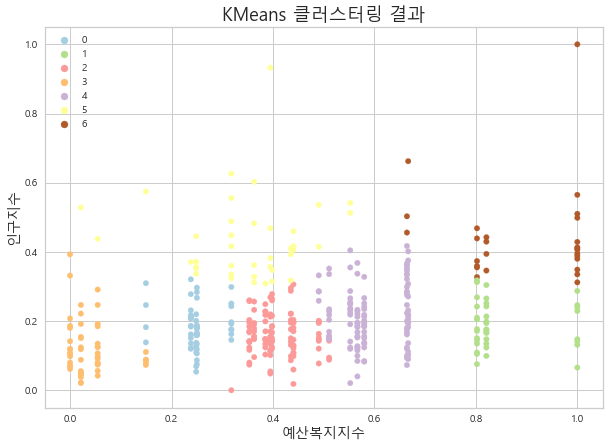

In [19]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(df2[1], df2[0], c=df2['c'], s=30, cmap='Paired')
plt.xlabel('예산복지지수', fontsize=14)
plt.ylabel('인구지수', fontsize=14)
plt.title('KMeans 클러스터링 결과', fontsize=18)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6])
plt.show()

In [11]:
df2.columns=['인구지수', '예산복지지수', 'c']

In [21]:
print('[클러스터 0]')
print(df2[df2['c']==0][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 1]')
print(df2[df2['c']==1][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 2]')
print(df2[df2['c']==2][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 3]')
print(df2[df2['c']==3][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 4]')
print(df2[df2['c']==4][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 5]')
print(df2[df2['c']==5][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 6]')
print(df2[df2['c']==6][['인구지수', '예산복지지수']].mean())

[클러스터 0]
인구지수      0.180786
예산복지지수    0.250577
dtype: float64

[클러스터 1]
인구지수      0.188378
예산복지지수    0.852494
dtype: float64

[클러스터 2]
인구지수      0.162136
예산복지지수    0.407339
dtype: float64

[클러스터 3]
인구지수      0.122726
예산복지지수    0.037367
dtype: float64

[클러스터 4]
인구지수      0.212812
예산복지지수    0.592525
dtype: float64

[클러스터 5]
인구지수      0.434128
예산복지지수    0.347113
dtype: float64

[클러스터 6]
인구지수      0.442400
예산복지지수    0.892263
dtype: float64


KMedoids

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMedoids(n_clusters=19),
                 k=(2, 20))

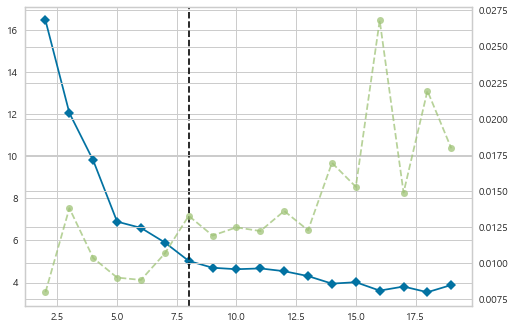

In [23]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

pam = KMedoids(n_clusters=2)
visualizer = KElbowVisualizer(pam, k=(2, 20))
visualizer.fit(df1)

In [12]:
from sklearn_extra.cluster import KMedoids
from scipy.stats import mode

pam = KMedoids(n_clusters=8, random_state=42)
pam.fit(df1)
clusters = pam.labels_

In [13]:
clusters

array([6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 3, 3, 3, 3, 7, 3, 7, 3,
       3, 7, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 7,
       5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 7, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 7, 7, 7, 7, 7, 7, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 7, 3, 3,
       7, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 7, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 7, 0,
       4, 0, 0, 0, 0, 0, 7, 0, 0, 4, 4, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7,
       3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7,

In [14]:
df3 = pd.DataFrame(df1)
df3['c'] = clusters
df3

,0,1,c
0,0.221610,0.021324,6
1,0.021167,0.021324,6
2,0.118577,0.021324,6
3,0.150659,0.021324,6
4,0.038061,0.021324,6
...,...,...,...
419,0.020654,0.552345,5
420,0.250475,0.552345,4
421,0.254126,0.552345,4
422,0.404399,0.552345,7


In [27]:
if os.name != 'posix':
    plt.rc("font", family="Malgun Gothic")

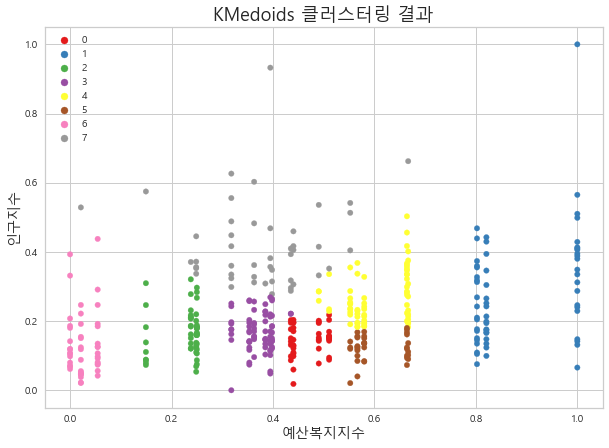

In [28]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(df3[1], df3[0], c=df3['c'], s=30, cmap='Set1')
plt.xlabel('예산복지지수', fontsize=14)
plt.ylabel('인구지수', fontsize=14)
plt.title('KMedoids 클러스터링 결과', fontsize=18)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7])
plt.show()

In [15]:
df3.columns=['인구지수', '예산복지지수', 'c']

In [30]:
print('[클러스터 0]')
print(df3[df3['c']==0][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 1]')
print(df3[df3['c']==1][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 2]')
print(df3[df3['c']==2][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 3]')
print(df3[df3['c']==3][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 4]')
print(df3[df3['c']==4][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 5]')
print(df3[df3['c']==5][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 6]')
print(df3[df3['c']==6][['인구지수', '예산복지지수']].mean())
print()
print('[클러스터 7]')
print(df3[df3['c']==7][['인구지수', '예산복지지수']].mean())

[클러스터 0]
인구지수      0.145850
예산복지지수    0.469475
dtype: float64

[클러스터 1]
인구지수      0.283507
예산복지지수    0.879321
dtype: float64

[클러스터 2]
인구지수      0.166943
예산복지지수    0.227894
dtype: float64

[클러스터 3]
인구지수      0.168630
예산복지지수    0.372595
dtype: float64

[클러스터 4]
인구지수      0.267995
예산복지지수    0.602784
dtype: float64

[클러스터 5]
인구지수      0.122237
예산복지지수    0.603805
dtype: float64

[클러스터 6]
인구지수      0.133143
예산복지지수    0.025799
dtype: float64

[클러스터 7]
인구지수      0.419349
예산복지지수    0.377228
dtype: float64


행정동 필터링

In [16]:
# KMeans
kmidx = df2[df2['c'].isin([6,5])].index.tolist()
len(kmidx)

66

In [17]:
# KMedoids
pamidx = df3[df3['c'].isin([1,7])].index.tolist()
len(pamidx)

108

In [18]:
# HC
hcidx = df1_[df1_['c'].isin([0,2])].index.tolist()
len(hcidx)

98

In [19]:
kmdong = df.iloc[kmidx, 1].values
kmdong = list(kmdong)
print(kmdong, len(kmdong))

['종로1.2.3.4가동', '한강로동', '광장동', '용신동', '장안1동', '송중동', '공릉2동', '상계1동', '상계6.7동', '공릉1동', '진관동', '북가좌2동', '충현동', '북아현동', '신촌동', '연희동', '용강동', '서교동', '성산2동', '상암동', '공덕동', '목1동', '신정3동', '목5동', '등촌3동', '가양1동', '발산1동', '공항동', '방화1동', '화곡1동', '구로3동', '오류2동', '가산동', '여의동', '당산2동', '영등포동', '문래동', '상도1동', '대방동', '노량진1동', '신사동', '논현1동', '논현2동', '삼성1동', '삼성2동', '대치4동', '역삼1동', '역삼2동', '도곡1동', '도곡2동', '세곡동', '압구정동', '청담동', '대치2동', '서초2동', '서초3동', '서초4동', '잠원동', '반포1동', '반포4동', '양재1동', '양재2동', '잠실3동', '위례동', '강일동', '길동'] 66


In [20]:
pamdong = df.iloc[pamidx, 1].values
pamdong = list(pamdong)
print(pamdong, len(pamdong))

['종로1.2.3.4가동', '광장동', '용신동', '전농1동', '장안1동', '망우본동', '송중동', '월계1동', '월계2동', '월계3동', '공릉2동', '하계1동', '하계2동', '중계본동', '중계1동', '중계4동', '상계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동', '상계3.4동', '상계6.7동', '중계2.3동', '공릉1동', '진관동', '북가좌2동', '충현동', '북아현동', '신촌동', '연희동', '용강동', '서교동', '성산2동', '상암동', '공덕동', '목1동', '신정3동', '목5동', '신정4동', '염창동', '등촌1동', '등촌2동', '등촌3동', '화곡본동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동', '가양1동', '가양2동', '가양3동', '발산1동', '공항동', '방화1동', '방화2동', '방화3동', '화곡1동', '우장산동', '신도림동', '구로3동', '오류2동', '가산동', '여의동', '당산2동', '영등포동', '문래동', '상도1동', '대방동', '흑석동', '노량진1동', '사당2동', '신사동', '논현1동', '논현2동', '삼성1동', '삼성2동', '대치1동', '대치4동', '역삼1동', '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포4동', '일원본동', '일원1동', '일원2동', '수서동', '세곡동', '압구정동', '청담동', '대치2동', '개포2동', '서초1동', '서초2동', '서초3동', '서초4동', '잠원동', '반포1동', '반포4동', '양재1동', '양재2동', '강일동', '천호2동', '길동'] 108


In [21]:
hcdong = df.iloc[hcidx, 1].values
hcdong = list(hcdong)
print(hcdong, len(hcdong))

['신내1동', '망우본동', '길음1동', '종암동', '월계1동', '월계2동', '월계3동', '공릉2동', '하계1동', '하계2동', '중계본동', '중계1동', '중계4동', '상계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동', '상계3.4동', '상계6.7동', '중계2.3동', '공릉1동', '녹번동', '불광1동', '대조동', '진관동', '역촌동', '목1동', '신정3동', '목5동', '염창동', '등촌1동', '등촌2동', '등촌3동', '화곡본동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동', '가양1동', '가양2동', '가양3동', '발산1동', '공항동', '방화1동', '방화2동', '방화3동', '화곡1동', '우장산동', '신도림동', '구로3동', '오류2동', '상도1동', '대방동', '청룡동', '신사동', '논현1동', '논현2동', '삼성1동', '삼성2동', '대치1동', '대치4동', '역삼1동', '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포4동', '일원본동', '일원1동', '일원2동', '수서동', '세곡동', '압구정동', '청담동', '대치2동', '개포2동', '풍납2동', '방이2동', '오금동', '송파1동', '석촌동', '삼전동', '가락본동', '가락1동', '문정2동', '잠실본동', '잠실6동', '잠실2동', '잠실3동', '장지동', '위례동', '강일동', '상일동', '천호2동', '길동'] 98


In [22]:
alldong = kmdong+pamdong+hcdong

from collections import Counter

result = Counter(alldong)
rst = []
for key in result:
    if result[key] >= 2:
        rst.append(key)
len(rst)

105

In [23]:
print(rst)

['종로1.2.3.4가동', '광장동', '용신동', '장안1동', '송중동', '공릉2동', '상계1동', '상계6.7동', '공릉1동', '진관동', '북가좌2동', '충현동', '북아현동', '신촌동', '연희동', '용강동', '서교동', '성산2동', '상암동', '공덕동', '목1동', '신정3동', '목5동', '등촌3동', '가양1동', '발산1동', '공항동', '방화1동', '화곡1동', '구로3동', '오류2동', '가산동', '여의동', '당산2동', '영등포동', '문래동', '상도1동', '대방동', '노량진1동', '신사동', '논현1동', '논현2동', '삼성1동', '삼성2동', '대치4동', '역삼1동', '역삼2동', '도곡1동', '도곡2동', '세곡동', '압구정동', '청담동', '대치2동', '서초2동', '서초3동', '서초4동', '잠원동', '반포1동', '반포4동', '양재1동', '양재2동', '잠실3동', '위례동', '강일동', '길동', '망우본동', '월계1동', '월계2동', '월계3동', '하계1동', '하계2동', '중계본동', '중계1동', '중계4동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동', '상계3.4동', '중계2.3동', '염창동', '등촌1동', '등촌2동', '화곡본동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동', '가양2동', '가양3동', '방화2동', '방화3동', '우장산동', '신도림동', '대치1동', '개포1동', '개포4동', '일원본동', '일원1동', '일원2동', '수서동', '개포2동', '천호2동']


In [25]:
filtered = pd.DataFrame({'시군구명':df['시군구명'],
                         '행정동명':df['행정동명']})
rstdf = pd.DataFrame({'행정동명':rst,
                     '1차필터링':1})
filtered = pd.merge(filtered, rstdf, on='행정동명', how='left')
filtered['1차필터링'].fillna(0, inplace=True)
filtered['1차필터링'] = filtered['1차필터링'].astype('int')
filtered

,시군구명,행정동명,1차필터링
0,종로구,사직동,0
1,종로구,삼청동,0
2,종로구,부암동,0
3,종로구,평창동,0
4,종로구,무악동,0
...,...,...,...
419,강동구,둔촌1동,0
420,강동구,둔촌2동,0
421,강동구,암사1동,0
422,강동구,천호2동,1


In [33]:
filtered.loc[328, '1차필터링'] = 0

In [34]:
filtered.to_csv('캡스톤1차필터링.csv', index=False, encoding='utf-8-sig')

In [75]:
import folium
import json

In [76]:
import os, json
import pandas as pd
import plotly.express as px
!git clone https://github.com/raqoon886/Local_HangJeongDong.git
os.chdir('./Local_HangJeongDong')

with open('./hangjeongdong_서울특별시.geojson', 'r') as f:
    seoul_geo = json.load(f)

fatal: destination path 'Local_HangJeongDong' already exists and is not an empty directory.


In [81]:
filtered['full_name'] = '서울특별시'+' '+filtered['시군구명']+' '+filtered['행정동명']
filtered['full_name'] = filtered['full_name'].apply(lambda x: x.replace('.','·'))
filtered

,시군구명,행정동명,1차필터링,full_name
0,종로구,사직동,0,서울특별시 종로구 사직동
1,종로구,삼청동,0,서울특별시 종로구 삼청동
2,종로구,부암동,0,서울특별시 종로구 부암동
3,종로구,평창동,0,서울특별시 종로구 평창동
4,종로구,무악동,0,서울특별시 종로구 무악동
...,...,...,...,...
419,강동구,둔촌1동,0,서울특별시 강동구 둔촌1동
420,강동구,둔촌2동,0,서울특별시 강동구 둔촌2동
421,강동구,암사1동,0,서울특별시 강동구 암사1동
422,강동구,천호2동,1,서울특별시 강동구 천호2동


In [1]:
map = px.choropleth_mapbox(filtered,
                              geojson=seoul_geo,
                              locations='full_name',
                              color='1차필터링',
                              color_continuous_scale='viridis', featureidkey = 'properties.adm_nm',
                              mapbox_style='white-bg', # 'carto-positron'
                              zoom=9.5, center = {"lat": 37.563383, "lon": 126.996039}, opacity=0.5,
                          )
map

NameError: name 'px' is not defined

In [87]:
idx = filtered[filtered['1차필터링']==1].index.values
filtered.iloc[idx, 0].value_counts()

강남구     22
강서구     20
노원구     19
서초구      8
마포구      5
서대문구     5
영등포구     4
구로구      3
동작구      3
양천구      3
강동구      3
동대문구     2
송파구      2
중랑구      1
강북구      1
종로구      1
관악구      1
은평구      1
금천구      1
광진구      1
Name: 시군구명, dtype: int64